# ***Importing Libraries***

In [1]:
!pip install textattack -q -q -q --exists-action i


import pandas as pd
import numpy as np 
import sys
from textattack.augmentation import EasyDataAugmenter

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import wordnet

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Input, Dropout, GRU, Lambda, Conv1D, MaxPooling1D


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 23.6.0 requires cupy-cuda11x>=12.0.0, which is not installed.
flask 2.3.2 requires click>=8.1.3, but you have click 8.0.4 which is incompatible.
aiobotocore 2.5.0 requires botocore<1.29.77,>=1.29.76, but you have botocore 1.29.158 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.5.1 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 11.0.0 which is incompatible.
dask-cuda 23.6.0 requires dask==2023.3.2, but you have dask 2023.6.0 which is incompatible.
dask-cudf 23.6.0 requires dask==2023.3.2, but you have dask 2023.6.0 which is incompatible.
distributed 2023.3.2.1 requires dask==2023.3.2, but you have dask 2023.6.0 which is incompatible.
kfp 1.8.21 requires google-api-python-client<2,>=1.7.8, but you have google-a

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw to /usr/share/nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# ***Using NLTK and TextAttack for Augmentation***

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw')
! unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
! unzip /usr/share/nltk_data/corpora/omw.zip -d /usr/share/nltk_data/corpora/

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to /usr/share/nltk_data...
[nltk_data]   Package omw is already up-to-date!
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordn

In [2]:
NUM = 8

In [5]:
from textattack.augmentation import EasyDataAugmenter
augmenter = EasyDataAugmenter(pct_words_to_swap=0.6,transformations_per_example=NUM)

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# ***Importing Data***

In [6]:
train = pd.read_csv('/kaggle/input/math-problem-categorization/train.csv')
test = pd.read_csv('/kaggle/input/math-problem-categorization/test.csv')
sample_submission = pd.read_csv('/kaggle/input/math-problem-categorization/sample_submission.csv')


print(train.head())
print()
print(train.info())
print()

print(train.duplicated().value_counts())     ## Checking for duplicate entries
print()

print("Invalid Enties: ",(train['category']).isnull().sum())     ## Checking for invalid entries
print()

                                             problem  category
0  At a ring toss game at a carnival, Marco throw...        19
1  What is `471 ÷ 100`? Interactive: Students fol...        22
2  Follow the directions below to create an equiv...        20
3  Solve the following system by substitution:\n`...        14
4  Solve the following system by substitution:\n`...        14

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   problem   250 non-null    object
 1   category  250 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB
None

False    250
dtype: int64

Invalid Enties:  0



# ***Splitting Data into Train, Val & Test sets & Preprocessing Code***

In [7]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[0-9]+', '#', text)
    return text

In [13]:
x_train = list(train['problem'].apply(clean_text))
y_train = train['category'].to_numpy()
x_test = list(test["problem"].apply(clean_text))

num_classes = len(np.unique(y_train))      

In [14]:
class preprocess():
    def __init__(self):
        self.tokenizer = None
        self.max_len = None
        
    def __call__(self, corpus, y=None):
        if self.tokenizer == None:
            newcorpus=[]
            newlabels=[]
            for problem, category in zip(corpus, y):
                demo = [problem] + augmenter.augment(problem)
                newcorpus+= demo
                newlabels+= [category] * len(demo)
                print(len(newcorpus), len(newlabels))

            corpus = newcorpus
            y = newlabels
            
            self.tokenizer = Tokenizer(oov_token= '<OOV>', char_level = False, filters = '')     ## Tokenize input sentence
            self.tokenizer.fit_on_texts(corpus) 
            self.total_words = len(self.tokenizer.word_index) + 1                                 ## Vocabulary Size
            self.max_len = len(max(corpus, key=len))                                              ## Length of longest sentence
        
        corpus = self.tokenizer.texts_to_sequences(corpus)
        corpus = pad_sequences(corpus, maxlen = self.max_len, padding = 'pre')
    
        if y==None:
            return corpus
        else:
            return [corpus,y] 

# ***Final Augmented Data***

In [15]:
preprocessor = preprocess()
x_train, y_train = preprocessor(x_train, y_train)

new_x_test = []
for problem in x_test:
    new_x_test+= [problem] + augmenter.augment(str(problem))            
x_test = new_x_test

x_test = preprocessor(x_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, stratify = y_train)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)


9 9
18 18
27 27
36 36
45 45
54 54
63 63
72 72
81 81
90 90
99 99
108 108
117 117
126 126
135 135
144 144
153 153
162 162
171 171
180 180
189 189
198 198
207 207
216 216
225 225
234 234
243 243
252 252
261 261
270 270
279 279
288 288
297 297
306 306
315 315
324 324
333 333
342 342
351 351
360 360
369 369
378 378
387 387
396 396
405 405
414 414
423 423
432 432
441 441
450 450
459 459
468 468
477 477
486 486
495 495
504 504
513 513
522 522
531 531
540 540
549 549
558 558
567 567
576 576
585 585
594 594
603 603
612 612
621 621
630 630
639 639
648 648
657 657
666 666
675 675
684 684
693 693
702 702
711 711
720 720
729 729
738 738
747 747
756 756
765 765
774 774
783 783
792 792
801 801
810 810
819 819
828 828
837 837
846 846
855 855
864 864
872 872
881 881
890 890
899 899
908 908
917 917
926 926
935 935
944 944
953 953
961 961
970 970
979 979
988 988
997 997
1006 1006
1015 1015
1024 1024
1033 1033
1042 1042
1051 1051
1060 1060
1069 1069
1078 1078
1087 1087
1096 1096
1105 1105
1114 1114
1123 1

# ***Model Checkpoint for saving most suitable weights***

In [16]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = 'checkpoints/weights.{epoch:02d}.hdf5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max')

# ***Getting Glove Embeddings***

In [ ]:
# !wget https://nlp.stanford.edu/data/glove.840B.300d.zip
# !unzip glove*.zip

In [17]:
import gc
gc.collect()

0

In [18]:
EMBEDDING_FILE = '/kaggle/working/glove.840B.300d.txt'
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')[:300]
embeddings_index = dict(get_coefs(*o.split(" ")) for o in   open(EMBEDDING_FILE))
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = -0.005838499,0.48782197
embed_size = all_embs.shape[1]

/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [19]:
def load_glove(word_index):
    nb_words = min(max_features, len(word_index)+1)
    embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
    for word, i in word_index.items():
        if i >= max_features: continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
        else:
            embedding_vector = embeddings_index.get(word.capitalize())
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
    return embedding_matrix


max_features = preprocessor.total_words
embedding_matrix = load_glove(preprocessor.tokenizer.word_index)

# ***Model Architecture***

In [83]:
model = Sequential()
model.add(Embedding(max_features, 300,embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix)))

model.add(Bidirectional(LSTM(32, dropout = 0.5)))
model.add(tf.keras.layers.Flatten())

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# ***Training Model***

In [84]:
history = model.fit(x_train, y_train, epochs = 60, validation_data=(x_val, y_val), callbacks= [model_checkpoint_callback])

Epoch 1/60
57/57 [==============================] - 13s 168ms/step - loss: 3.0808 - accuracy: 0.1169 - val_loss: 2.7509 - val_accuracy: 0.3378
Epoch 2/60
57/57 [==============================] - 8s 134ms/step - loss: 2.6660 - accuracy: 0.2695 - val_loss: 2.3362 - val_accuracy: 0.3556
Epoch 3/60
57/57 [==============================] - 7s 124ms/step - loss: 2.2811 - accuracy: 0.3742 - val_loss: 1.9309 - val_accuracy: 0.4667
Epoch 4/60
57/57 [==============================] - 6s 98ms/step - loss: 1.9990 - accuracy: 0.4393 - val_loss: 1.6626 - val_accuracy: 0.5933
Epoch 5/60
57/57 [==============================] - 5s 85ms/step - loss: 1.7848 - accuracy: 0.4972 - val_loss: 1.4586 - val_accuracy: 0.5844
Epoch 6/60
57/57 [==============================] - 5s 97ms/step - loss: 1.6060 - accuracy: 0.5329 - val_loss: 1.3131 - val_accuracy: 0.6467
Epoch 7/60
57/57 [==============================] - 5s 94ms/step - loss: 1.4314 - accuracy: 0.5969 - val_loss: 1.1560 - val_accuracy: 0.6933
Epoch 8/6

# ***Plotting History***

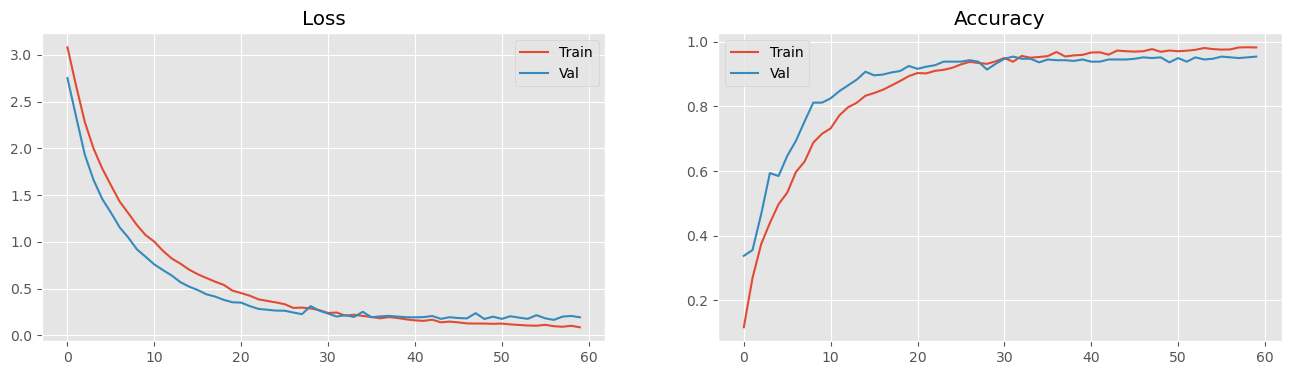

In [85]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (16,4)
mylen = range(len(history.history["loss"]))

plt.subplot(1,2,1)
plt.plot(mylen, history.history["loss"], label="Train")
plt.plot(mylen, history.history["val_loss"], label="Val")
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(mylen, history.history["accuracy"], label= "Train")
plt.plot(mylen, history.history["val_accuracy"], label="Val")
plt.title("Accuracy")
plt.legend()
plt.show()


# ***Loading Most Suitable Weights***

In [86]:
model.load_weights('checkpoints/weights.40.hdf5')

# ***Augmenting Test Dataset***

Each sample will be augmented multiple times, and i'll take mode of these pedictions.

In [46]:
x_test = list(test["problem"].apply(clean_text))
new_x_test=[]
for problem in x_test:
    demo= [problem] + augmenter.augment(str(problem))            
    demo = preprocessor(demo)
    new_x_test+= [[demo,len(demo)]]
    print([demo.shape,len(demo)])
    print("New Length:", len(new_x_test))
    
    
    

[(9, 639), 9]
New Length: 1
[(9, 639), 9]
New Length: 2
[(9, 639), 9]
New Length: 3
[(9, 639), 9]
New Length: 4
[(9, 639), 9]
New Length: 5
[(9, 639), 9]
New Length: 6
[(9, 639), 9]
New Length: 7
[(9, 639), 9]
New Length: 8
[(8, 639), 8]
New Length: 9
[(9, 639), 9]
New Length: 10
[(9, 639), 9]
New Length: 11
[(9, 639), 9]
New Length: 12
[(9, 639), 9]
New Length: 13
[(9, 639), 9]
New Length: 14
[(9, 639), 9]
New Length: 15
[(9, 639), 9]
New Length: 16
[(9, 639), 9]
New Length: 17
[(9, 639), 9]
New Length: 18
[(9, 639), 9]
New Length: 19
[(9, 639), 9]
New Length: 20
[(9, 639), 9]
New Length: 21
[(9, 639), 9]
New Length: 22
[(9, 639), 9]
New Length: 23
[(9, 639), 9]
New Length: 24
[(9, 639), 9]
New Length: 25
[(9, 639), 9]
New Length: 26
[(9, 639), 9]
New Length: 27
[(9, 639), 9]
New Length: 28
[(9, 639), 9]
New Length: 29
[(9, 639), 9]
New Length: 30
[(9, 639), 9]
New Length: 31
[(9, 639), 9]
New Length: 32
[(9, 639), 9]
New Length: 33
[(9, 639), 9]
New Length: 34
[(9, 639), 9]
New Lengt

# ***Predicting Results***

In [87]:
soln=[]
for sample,length in new_x_test:
    total_preds = np.argmax(model(sample),axis = 1).reshape(-1,length)
    ans = stats.mode(total_preds,axis = 1, keepdims= False)[0].reshape(-1)
    print(ans, end="")
    soln += [ans[0]]

[19][8][8][19][5][23][3][4][24][8][4][4][1][19][11][23][1][2][4][16][16][22][8][19][10][8][16][12][13][18][14][10][21][22][11][7][19][8][18][1][19][17][15][3][12][20][0][4][0][8][23][11][24][24][15][17][20][1][13][16][18][18][8][14][1][6][13][19][18][4][4][22][8][13][10][5][0][14][1][13][7][15][16][24][11][15][6][19][9][12][10][22][24][3][14][11][20][1][23][15][6][19][14][4][3][20][5][6][3][12][0][0][10][18][12][21][23][16][19][19][8][6][20][22][4]

In [88]:
test['category'] = soln
test.to_csv("Raunaq.csv",index = False)

In [ ]:
# from scipy import stats
# total_preds = np.argmax(model(x_test),axis = 1).reshape(-1,NUM)
# total_preds = stats.mode(total_preds,axis = 1)[0].reshape(-1)